# 1. Introduction to Gaussian Distribution

The Gaussian distribution, also known as the normal distribution, is one of the most important probability distributions in statistics and machine learning. It's characterized by its bell-shaped curve and is defined by two parameters: the mean (μ) and the variance (σ²).

## 1.1 Univariate Gaussian Distribution

The probability density function (PDF) of a univariate Gaussian distribution is given by:

f(x | μ, σ²) = (1 / √(2πσ²)) * exp(-(x - μ)² / (2σ²))

Where:
- x is the variable
- μ is the mean (average value)
- σ² is the variance (spread of the distribution)

Let's visualize this using Python:

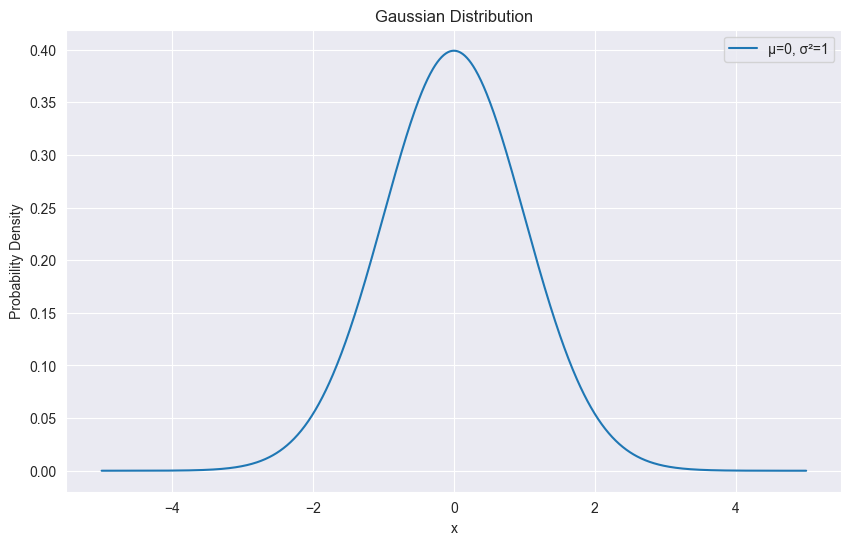

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)**2 / (2 * sigma**2))

x = np.linspace(-5, 5, 1000)
plt.figure(figsize=(10, 6))
plt.plot(x, gaussian(x, 0, 1), label='μ=0, σ²=1')
plt.title('Gaussian Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

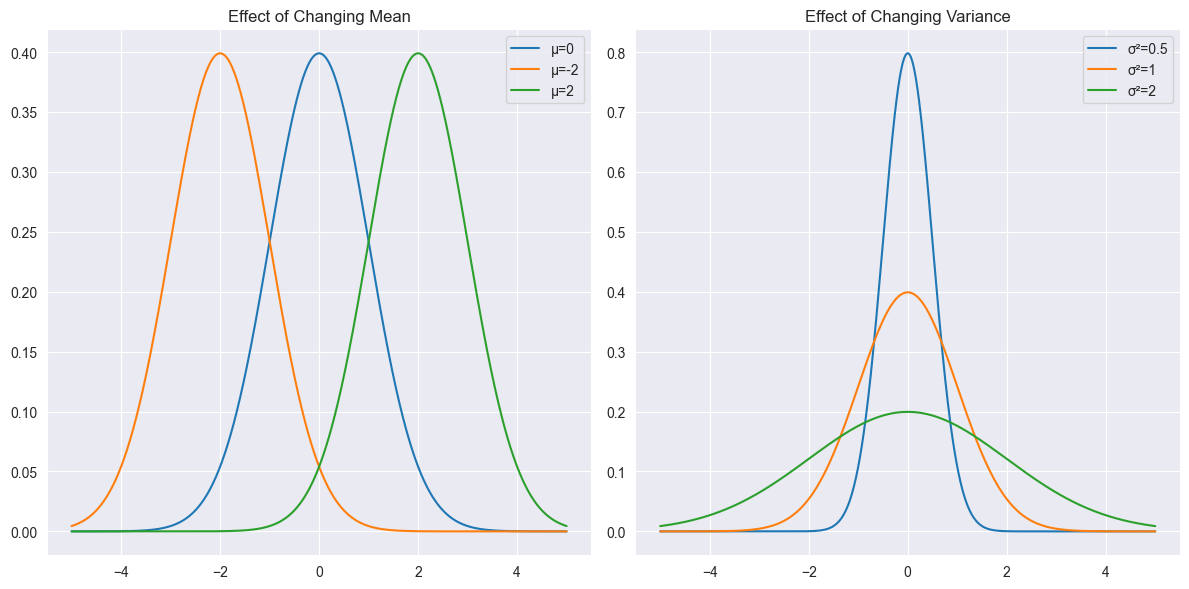

In [2]:
plt.figure(figsize=(12, 6))

# Varying mean
plt.subplot(1, 2, 1)
plt.plot(x, gaussian(x, 0, 1), label='μ=0')
plt.plot(x, gaussian(x, -2, 1), label='μ=-2')
plt.plot(x, gaussian(x, 2, 1), label='μ=2')
plt.title('Effect of Changing Mean')
plt.legend()

# Varying variance
plt.subplot(1, 2, 2)
plt.plot(x, gaussian(x, 0, 0.5), label='σ²=0.5')
plt.plot(x, gaussian(x, 0, 1), label='σ²=1')
plt.plot(x, gaussian(x, 0, 2), label='σ²=2')
plt.title('Effect of Changing Variance')
plt.legend()

plt.tight_layout()
plt.show()

### Hands-on Exercise:

Try modifying the mean and variance values from the provided code below. Observe how:
1. Changing the mean shifts the center of the distribution.
2. Increasing the variance makes the distribution wider and flatter.
3. Decreasing the variance makes the distribution narrower and taller.

In [ ]:
#Your code here

# 2. Multivariate Gaussian Distribution

## 2.1 Extension to Multiple Dimensions

The multivariate Gaussian distribution is an extension of the univariate Gaussian to higher dimensions. For a d-dimensional vector x, it's defined by:

- A mean vector μ (d x 1)
- A covariance matrix Σ (d x d)

The PDF is given by:

f(x | μ, Σ) = (1 / ((2π)^(d/2) * |Σ|^(1/2))) * exp(-0.5 * (x - μ)ᵀ * Σ⁻¹ * (x - μ))

Where |Σ| is the determinant of Σ, and Σ⁻¹ is its inverse.

## 2.2 Covariance Matrix

The covariance matrix Σ captures the variance of each variable along its diagonal and the covariance between variables in its off-diagonal elements.

- Diagonal elements: Σᵢᵢ = Var(Xᵢ)
- Off-diagonal elements: Σᵢⱼ = Cov(Xᵢ, Xⱼ)

A diagonal covariance matrix implies uncorrelated variables, while non-zero off-diagonal elements indicate correlation.

## 2.3 Visualization

Let's visualize a 2D Gaussian distribution:

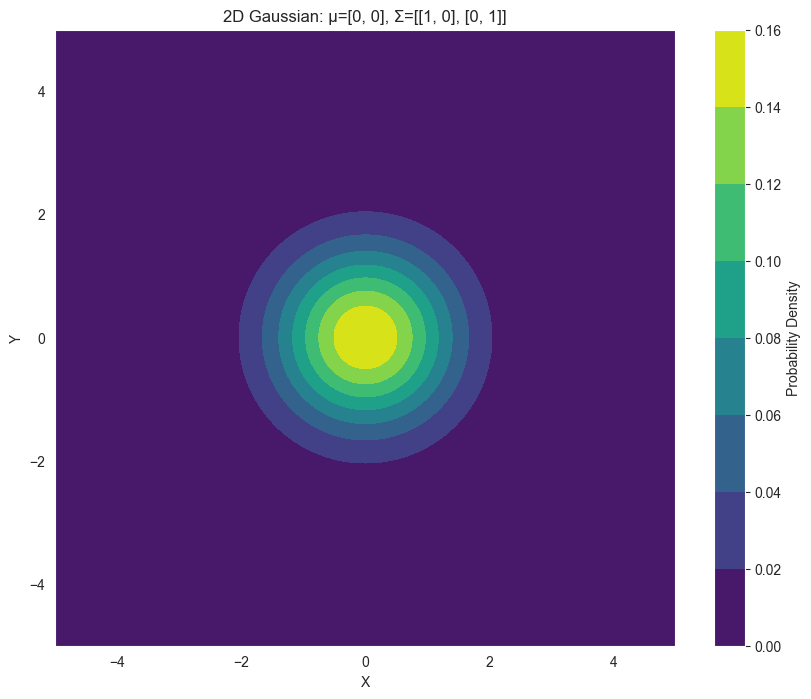

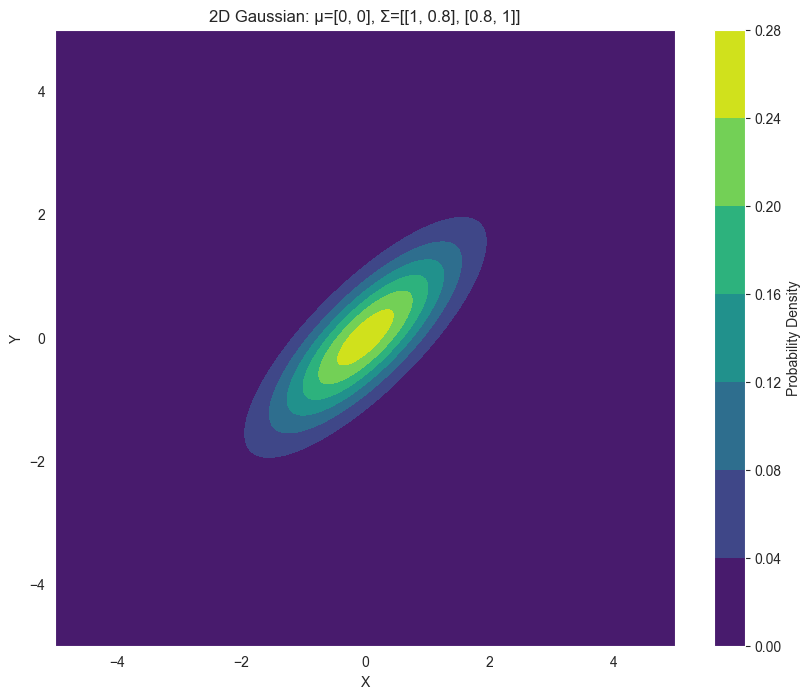

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def plot_2d_gaussian(mu, cov):
    x, y = np.mgrid[-5:5:.01, -5:5:.01]
    pos = np.dstack((x, y))
    rv = multivariate_normal(mu, cov)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(x, y, rv.pdf(pos), cmap='viridis')
    plt.colorbar(label='Probability Density')
    plt.title(f'2D Gaussian: μ={mu}, Σ={cov}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

# Example 1: Uncorrelated variables
mu1 = [0, 0]
cov1 = [[1, 0], [0, 1]]
plot_2d_gaussian(mu1, cov1)

# Example 2: Correlated variables
mu2 = [0, 0]
cov2 = [[1, 0.8], [0.8, 1]]
plot_2d_gaussian(mu2, cov2)

### Hands-on Exercise:

1. Modify the mean vector and covariance matrix in the examples above.
2. Observe how changing the diagonal elements of the covariance matrix affects the spread in each dimension.
3. Experiment with the off-diagonal elements to see how they affect the orientation of the distribution.

Plot each variation and discuss how the shape and orientation of the distribution changes.

In [49]:
#Your code here

# 3. Parameter Estimation Challenge

In this section, we'll explore the challenge of estimating the parameters of a Gaussian distribution just by looking at its plot. This exercise will help you understand why we need systematic methods for parameter estimation.

## 3.1 Given Example

First, let's generate a 2D Gaussian distribution with known parameters. We'll use this as our "mystery" distribution for the challenge. Don't spoil it for yourself!


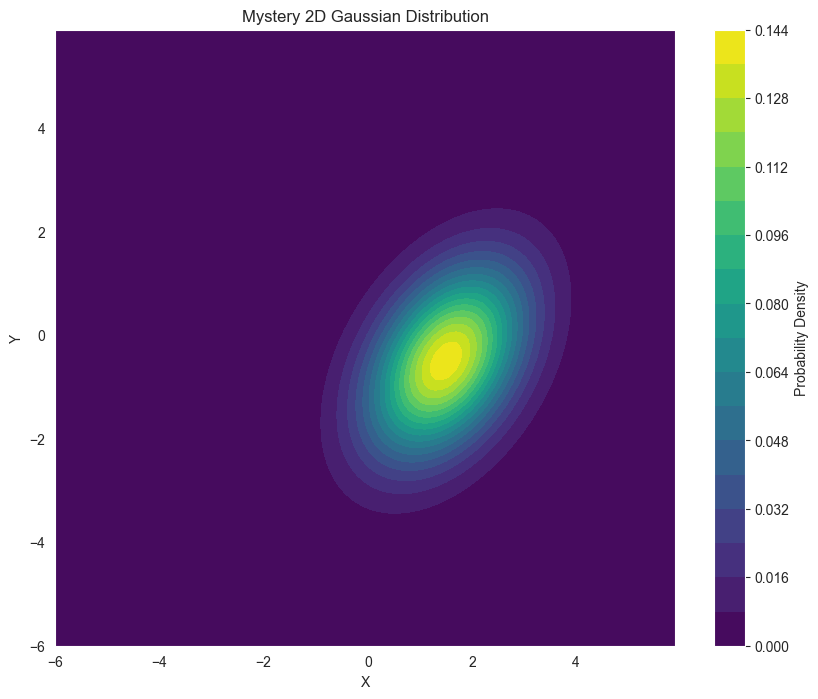

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Set random seed for reproducibility
np.random.seed(42)

# True parameters - they're simple but I've hidden them behind these convoluted things:)
true_mean = [np.around(50*np.pi/105,2), -np.around(50*np.pi/105,2)/np.floor(np.pi)]
true_cov = [[np.sin(2*np.pi)**2 + 1, np.around(50*np.pi/105,2)/np.floor(np.pi)], 
            [np.around(50*np.pi/105,2)/np.floor(np.pi), 2* np.around(np.around(50*np.pi/105,2)/np.floor(np.pi) + np.pi/12.5, 2)]]

# Generate data
x, y = np.mgrid[-6:6:.1, -6:6:.1]
pos = np.dstack((x, y))
rv = multivariate_normal(true_mean, true_cov)

# Plot the distribution
plt.figure(figsize=(10, 8))
plt.contourf(x, y, rv.pdf(pos), levels=20, cmap='viridis')
plt.colorbar(label='Probability Density')
plt.title('Mystery 2D Gaussian Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## 3.2 Parameter Guessing

Now, take a moment to look at the plot and try to estimate the following:

1. The mean vector (μ): Try to guess the x and y coordinates of the center of the distribution.
2. The covariance matrix (Σ): 
   - Estimate the variances (spread) in the x and y directions.
   - Try to guess if there's a positive or negative correlation between x and y, and how strong it is.

Try your guesses below!

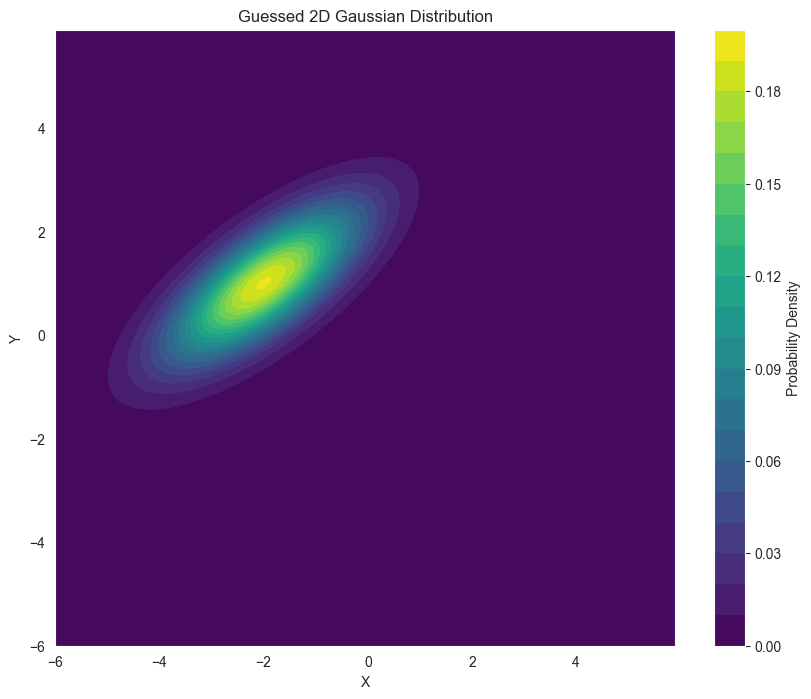

In [51]:
guessed_mean = [-2,1]
guessed_cov = [[1.5, 0.9], [0.9, 1.0]]

# Generate data
x, y = np.mgrid[-6:6:.1, -6:6:.1]
pos = np.dstack((x, y))
rv = multivariate_normal(guessed_mean, guessed_cov)

# Plot the distribution
plt.figure(figsize=(10, 8))
plt.contourf(x, y, rv.pdf(pos), levels=20, cmap='viridis')
plt.colorbar(label='Probability Density')
plt.title('Guessed 2D Gaussian Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

After trying a few guesses, consider the following questions:

1. How difficult was it to accurately estimate the mean?
2. Was it challenging to guess the variances (diagonal elements of the covariance matrix)?
3. How hard was it to estimate the correlation (off-diagonal elements of the covariance matrix)?
4. What features of the distribution were easiest and hardest to estimate visually?

This exercise demonstrates why we need systematic methods to estimate distribution parameters, especially for:

- High-dimensional data where visualization is difficult or impossible.
- Datasets with a large number of samples where visual estimation becomes impractical.
- Applications requiring precise parameter estimates.

In the next section, we will look at a method we may use to estimate these parameters.

# 3.4 Maximum Likelihood Estimation for Multivariate Gaussian Parameters

Maximum Likelihood Estimation is a method of estimating the parameters of a probability distribution by maximizing a likelihood function. The likelihood function measures how probable the observed data is for different values of the distribution's parameters.

For a multivariate Gaussian distribution, we want to estimate two parameters:

The mean vector (μ)
The covariance matrix (Σ)

For a dataset X = {x₁, x₂, ..., xₙ} where each xᵢ is a d-dimensional vector, the log-likelihood function for a multivariate Gaussian is:

L(μ, Σ; X) = -0.5n * log(det(Σ)) - 0.5 * Σᵢ (xᵢ - μ)ᵀ Σ⁻¹ (xᵢ - μ) - 0.5nd * log(2π)
Where n is the number of data points and d is the dimension of each data point.

The MLE estimates for μ and Σ can be derived analytically:
μ_MLE = (1/n) * Σᵢ xᵢ
Σ_MLE = (1/n) * Σᵢ (xᵢ - μ_MLE)(xᵢ - μ_MLE)ᵀ

Can you implement this algorithm in Python using online resources for ideas? Can you then estimate what our mystery Gaussian distribution is?

In [52]:
#Your code here

What about if you consider the following cases too, how do they impact the estimation of the parameters?

1. Can you create a function to calculate the error? Use this for the next questions.
2. Add some outliers to the dataset- let us say 5% drawn from a uniform distribution.
3. Higher dimensional Gaussians- try scaling up to 3D, 4D, and higher dimensional Gaussian distributions.

In [ ]:
#Code here

# 5. Introduction to Gaussian Mixture Models (GMMs)

Gaussian Mixture Models (GMMs) are a powerful and flexible tool for modeling complex probability distributions. They can be thought of as a combination of multiple Gaussian distributions, allowing us to model multi-modal data or clusters with different shapes and orientations.

A mixture model is a probabilistic model that represents the presence of subpopulations within an overall population. In a GMM, each subpopulation is modeled by a Gaussian distribution.
The probability density function (PDF) of a GMM is a weighted sum of K component Gaussian densities:

p(x) = Σᵢ₌₁ᴷ πᵢ N(x | μᵢ, Σᵢ)

Where:

K is the number of components
πᵢ are the mixture weights (Σᵢ₌₁ᴷ πᵢ = 1)
N(x | μᵢ, Σᵢ) is the PDF of the i-th Gaussian component

A GMM is fully described by three parameters:

Mixture weights (π): The probability of each component
Mean vectors (μ): The center of each Gaussian component
Covariance matrices (Σ): The shape and orientation of each component

[You may want to browse this notebook for a deeper look](https://stephens999.github.io/fiveMinuteStats/intro_to_mixture_models.html)

## 5.1 Implementing a Simple GMM
Let's implement a simple GMM and visualize it:

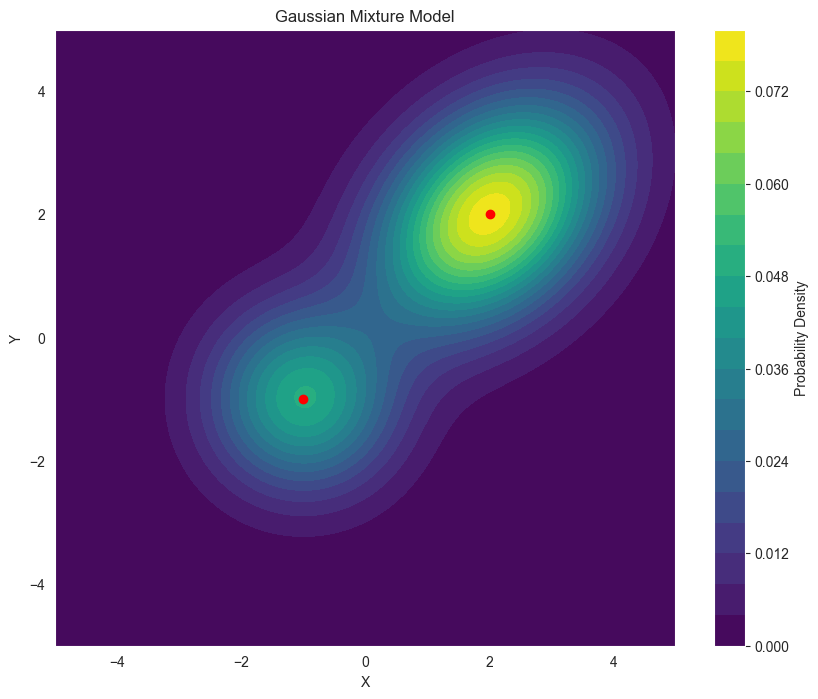

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def gmm_pdf(X, weights, means, covs):
    n_components = len(weights)
    pdf = np.zeros(X.shape[0])
    for i in range(n_components):
        pdf += weights[i] * multivariate_normal.pdf(X, mean=means[i], cov=covs[i])
    return pdf

# Define GMM parameters
weights = [0.3, 0.7]
means = [[-1, -1], [2, 2]]
covs = [[[1, 0], [0, 1]], [[1.5, 0.5], [0.5, 1.5]]]

# Create a mesh grid
x, y = np.mgrid[-5:5:.01, -5:5:.01]
pos = np.dstack((x, y))

# Calculate GMM PDF
gmm_values = gmm_pdf(pos.reshape(-1, 2), weights, means, covs).reshape(x.shape)

# Plot the GMM
plt.figure(figsize=(10, 8))
plt.contourf(x, y, gmm_values, levels=20, cmap='viridis')
plt.colorbar(label='Probability Density')
plt.title('Gaussian Mixture Model')
plt.xlabel('X')
plt.ylabel('Y')

# Plot the component means
for mean in means:
    plt.plot(mean[0], mean[1], 'ro')

plt.show()

## 5.2 Real-Life Example: Book Pricing Analysis

The publishing industry often uses different pricing strategies for various book formats. Let's use a Gaussian Mixture Model to analyze the pricing distribution of books across three formats: ebook, softback, and hardback.

We'll create a synthetic dataset that mimics realistic pricing patterns and then use a GMM to uncover the underlying structure in the data. We'll use the SKLearn implementation as it has some handy built in features that we can use.

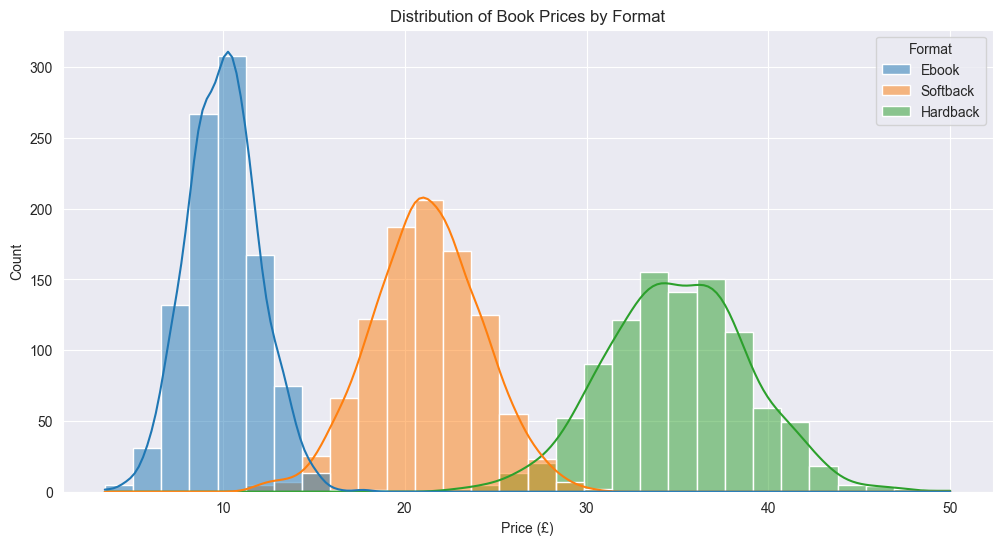

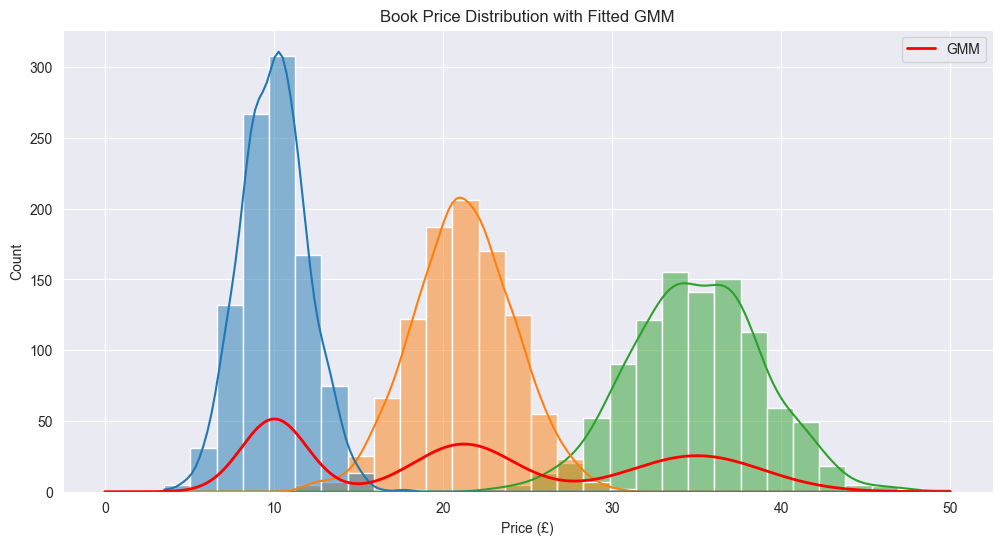

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import pandas as pd
import seaborn as sns

# Generate synthetic book pricing data
np.random.seed(42)

# Ebooks: typically cheaper, tighter distribution
ebooks = np.random.normal(9.99, 2, 1000)
ebooks = np.clip(ebooks, 0, 25)  # Ensure no negative prices

# Softbacks: medium price, wider distribution
softbacks = np.random.normal(20.99, 3, 1000)
softbacks = np.clip(softbacks, 5, 30)

# Hardbacks: most expensive, widest distribution
hardbacks = np.random.normal(34.99, 4, 1000)
hardbacks = np.clip(hardbacks, 10, 50)

# Combine all prices and format labels
prices = np.concatenate([ebooks, softbacks, hardbacks])
formats = np.concatenate([
    np.full(1000, 'Ebook'),
    np.full(1000, 'Softback'),
    np.full(1000, 'Hardback')
])

# Create a DataFrame for easy plotting
df = pd.DataFrame({'Price': prices, 'Format': formats})

# Plot the distribution of prices
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Price', hue='Format', kde=True, bins=30)
plt.title('Distribution of Book Prices by Format')
plt.xlabel('Price (£)')
plt.ylabel('Count')
plt.show()

# Fit GMM
X = prices.reshape(-1, 1)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)

# Generate points from the GMM for plotting
x = np.linspace(0, 50, 1000).reshape(-1, 1)
y = np.exp(gmm.score_samples(x))

# Plot the results
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Price', hue='Format', kde=True, bins=30, alpha=0.5)
plt.plot(x, y * 750, 'r-', linewidth=2, label='GMM')
plt.title('Book Price Distribution with Fitted GMM')
plt.xlabel('Price (£)')
plt.ylabel('Count')
plt.legend()
plt.show()


Using this fitted model, can you assess how well our model fits our data? Use the predict function.

In [ ]:
#Your code here

Now try some of the following exercises:

1. Generate a new dataset where the price distributions for different formats overlap more. How does this affect the GMM's ability to distinguish between formats? 
2. Use the fitted GMM to classify a new set of book prices into the most likely format. How accurate is this classification compared to the actual formats?3
3. Try fitting GMMs with different numbers of components (2, 3, 4, etc.). Use an information criterion like AIC or BIC to determine the optimal number. Does the optimal number always match the number of formats?

In [ ]:
#Your code here

## 5.3 EM Algorithm For GMM's

The Expectation-Maximization (EM) algorithm is a powerful method for finding maximum likelihood estimates of parameters in statistical models with latent variables. In the context of Gaussian Mixture Models (GMMs), EM is used to estimate the parameters when we don't know which component generated each data point.

The EM algorithm consists of two main steps which are repeated iteratively until convergence:

1. Expectation (E) step: Estimate the probability of each data point belonging to each Gaussian component, given the current parameter estimates.
2. Maximization (M) step: Update the parameters (means, covariances, and weights) to maximize the likelihood, given the probabilities calculated in the E step.

This comes with some advantages and drawbacks. 

Advantages:

- Guaranteed to increase the likelihood at each iteration
- Can handle missing data and hidden variables

Limitations:

- Can converge to local optima, sensitive to initialization
- Number of components needs to be specified in advance
- Can be slow for large datasets or high-dimensional data

For GMM's in particular, the algorithm works as follows:

1. Initialize the parameters: means (μₖ), covariances (Σₖ), and weights (πₖ) for K components.
2. E-step: For each data point xᵢ and component k, compute the responsibility:
   γᵢₖ = πₖ N(xᵢ|μₖ,Σₖ) / Σⱼ πⱼ N(xᵢ|μⱼ,Σⱼ)
3. M-step: Update the parameters:
   μₖ = Σᵢ γᵢₖxᵢ / Σᵢ γᵢₖ
   Σₖ = Σᵢ γᵢₖ(xᵢ-μₖ)(xᵢ-μₖ)ᵀ / Σᵢ γᵢₖ
   πₖ = Σᵢ γᵢₖ / N

Repeat steps 2-3 until convergence. 

Using online resources such as [this notebook](https://stephens999.github.io/fiveMinuteStats/intro_to_em.html), can you implement an EM algorithm to infer the GMM parameters for a GMM with the following 3 components?

In [ ]:
# Generate synthetic data
np.random.seed(42)
n_samples = 1000

# Generate three clusters
X1 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], n_samples // 3)
X2 = np.random.multivariate_normal([5, 5], [[1.5, 0.5], [0.5, 1.5]], n_samples // 3)
X3 = np.random.multivariate_normal([-3, 5], [[1.2, -0.7], [-0.7, 1.2]], n_samples // 3)
X = np.vstack((X1, X2, X3))

#Your code here

## Further Exercise: Non-Gaussian Distributions

As an extension, you should reconsider this workshop in light of using non-Gaussian distributions.

1. Try to implement MLE for a multivariate exponential distribution- what changes do you need to make?

In [ ]:
#Code for  MLE of a exp distribution

2. Does a mixture model for non-Gaussian distributions make sense? Can you try making an Exponential Mixture Model?

In [ ]:
#Code for a EMM

3. What if you use a counts based probability distribution for a MM, like the Poisson or Negative Binomial distribution? Does it make sense to do this?

In [ ]:
#Code for a PMM

4. Finally, what if you wanted to implement the EM algorithm for a non-Gaussian distribution? Try it below:

In [ ]:
#Code for EM on Non-Gaussian MM's